In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

读取文本文件并进行数据的清洗：
空格的处理：文本中含有大量的空格，所以去掉空格的方法就是replace方法
注意：replace方法不能改变源数据，必须对操作后的数据再次赋值
广告信息的处理方式：->《红楼梦》小说来源于飞卢小说网
用split函数删除广告信息；注意分析，此时的str是一个长长的字符串，是不可改变的数据类型
所以用split函数将字符串切合分为数组，在将数组转换为dataframe操作

In [5]:
with open("txt_analysis.txt",encoding='gbk') as f:
    txt = f.read()
txt = txt.replace(' ','')
txt = txt.replace('\u3000','')

In [11]:
#一个长列表
ls = txt.split()
#数组转换为dataframe
df = pd.DataFrame(ls,columns=['text'])
#正则表达式去除广告：~取反 是没有^《红楼梦》的行
#df.text.str:关键的操作，每一行元素的字符串提取
df = df[~df.text.str.contains("^《红楼梦》")]
#将乱序索引重新排序
df.index = range(df.size)
#重置索引
df = df.reset_index(drop=True)
df

,text
0,第一回甄士隐梦幻识通灵贾雨村风尘怀闺秀
1,此开卷第一回也。作者自云：因曾历过一番梦幻之后，故将真事隐去，而借通灵之说。
2,此回中凡用“梦”用“幻”等字，是提醒阅者眼目，亦是此书立意本旨。
3,第二回贾夫人仙逝扬州城冷子兴演说荣国府
4,诗云
5,一局输赢料不真，香销茶尽尚逡巡。
6,却说封肃因听见公差传唤，忙出来陪笑启问。
7,第三回贾雨村夤缘复旧职林黛玉抛父进京都
8,却说雨村忙回头看时，不是别人，乃是当日同僚一案参革的号张如圭者。
9,无故寻愁觅恨，有时似傻如狂。


查找每回的开头并提取

In [ ]:
chap_index = df.text.str.contains("^第.+回")
chap_info = df[chap_index]
chap_info = chap_info.reset_index(drop=True)
#chap_info
chap_s = chap_info["text"].str.split("回")
#匿名函数的巧妙使用
chap_info["chap_No"] = list(map(lambda x:x[0]+'回',chap_s))
chap_info.drop('text',axis=1,inplace=True)
chap_info['start'] = df[chap_index].index

In [41]:
#计算每回的段落数
s = np.array(chap_info['start'])
#矩阵的操作
para = s[1:]-s[0:-1]
cnt = list(para)

cnt.append(df.size-s[-1])
chap_info['para_count'] = cnt
chap_info


,text
0,第一回甄士隐梦幻识通灵贾雨村风尘怀闺秀
1,此开卷第一回也。作者自云：因曾历过一番梦幻之后，故将真事隐去，而借通灵之说。
2,此回中凡用“梦”用“幻”等字，是提醒阅者眼目，亦是此书立意本旨。
3,第二回贾夫人仙逝扬州城冷子兴演说荣国府
4,诗云
5,一局输赢料不真，香销茶尽尚逡巡。
6,却说封肃因听见公差传唤，忙出来陪笑启问。
7,第三回贾雨村夤缘复旧职林黛玉抛父进京都
8,却说雨村忙回头看时，不是别人，乃是当日同僚一案参革的号张如圭者。
9,无故寻愁觅恨，有时似傻如狂。


In [45]:
para_txt = []
for i in range(chap_info.shape[0]):
    t = df['text'][chap_info['start'][i]:(chap_info['start'][i]+chap_info['para_count'][i])]
    t = "".join(list(t))
    para_txt.append(t)
#para_txt
chap_info['para_txt'] = para_txt
chap_info['words'] = chap_info['para_txt'].str.len()
chap_info                                    

,chap_No,start,para_count,para_txt,words
0,第一回,0,3,第一回甄士隐梦幻识通灵贾雨村风尘怀闺秀此开卷第一回也。作者自云：因曾历过一番梦幻之后，故将真...,89
1,第二回,3,4,第二回贾夫人仙逝扬州城冷子兴演说荣国府诗云一局输赢料不真，香销茶尽尚逡巡。却说封肃因听见公差...,57
2,第三回,7,4,第三回贾雨村夤缘复旧职林黛玉抛父进京都却说雨村忙回头看时，不是别人，乃是当日同僚一案参革的号...,86


可视化各个段落的字数和段落数

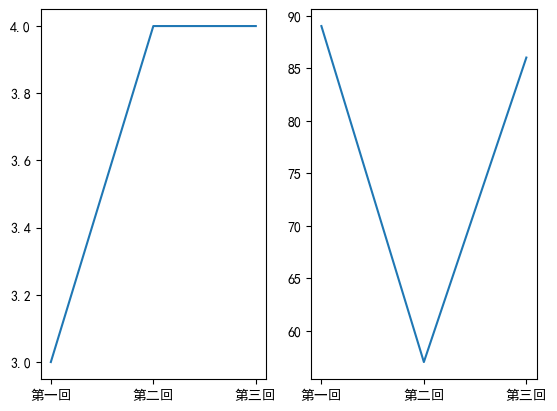

In [48]:
plt.rcParams["font.sans-serif"]="SimHei"
plt.subplot(121)
plt.plot(chap_info['para_count'])
plt.xticks(range(3),chap_info['chap_No'])
plt.subplot(122)
plt.plot(chap_info['words'])
plt.xticks(range(3),chap_info['chap_No'])
plt.show()
                   